In [2]:
import yfinance as yf
from datetime import datetime, timedelta

In [3]:
# data = yf.download(tickers=["AAPL","MSFT","GOOGL"], period="1mo", interval="1d", multi_level_index=False)
data = yf.download(tickers=["BTC-USD"], start="2010-01-01", end="2025-02-01", interval="1d", multi_level_index=False)

# data.reset_index(inplace=True)
data = data[[ 'Open', 'High', 'Low', 'Close', 'Volume']]

print(data)

/var/folders/r9/svkldn8s2hj_416_dclgbck00000gn/T/ipykernel_9089/3590609180.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=["BTC-USD"], start="2010-01-01", end="2025-02-01", interval="1d", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed

                     Open           High            Low          Close  \
Date                                                                     
2014-09-17     465.864014     468.174011     452.421997     457.334015   
2014-09-18     456.859985     456.859985     413.104004     424.440002   
2014-09-19     424.102997     427.834991     384.532013     394.795990   
2014-09-20     394.673004     423.295990     389.882996     408.903992   
2014-09-21     408.084991     412.425995     393.181000     398.821014   
...                   ...            ...            ...            ...   
2025-01-27  102680.304688  103214.109375   97795.937500  102087.687500   
2025-01-28  102095.414062  103730.820312  100238.187500  101332.476562   
2025-01-29  101317.523438  104750.804688  101283.820312  103703.210938   
2025-01-30  103709.335938  106418.765625  103321.648438  104735.304688   
2025-01-31  104737.562500  106026.351562  101543.882812  102405.023438   

                 Volume  
Date       

In [4]:
msft_data = data.xs('MSFT', level=1, axis=1)
print(msft_data)

TypeError: Index must be a MultiIndex

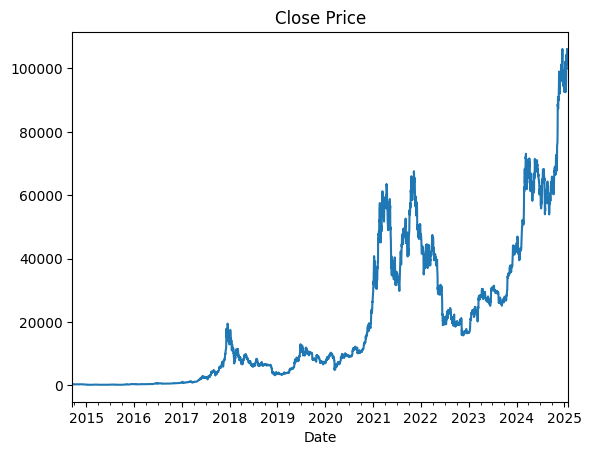

In [5]:
import matplotlib.pyplot as plt
data['Close'].plot(title="Close Price")
plt.show()

In [7]:
# Function to download and save data for different timeframes
import os

def get_and_save_btc_data(ticker, interval, days_back):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days_back)
    
    # Create folder based on ticker name
    folder_name = ticker.replace("-", "_")  # Replace - with _ for folder name
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Created folder: {folder_name}")
    
    print(f"\nDownloading {ticker} data for {interval} interval...")
    print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
    
    data = yf.download(
        tickers=[ticker],
        start=start_date.strftime('%Y-%m-%d'),
        end=end_date.strftime('%Y-%m-%d'),
        interval=interval,
        multi_level_index=False
    )
    
    if len(data) == 0:
        print(f"No data available for {interval} interval in the specified date range.")
        return None
        
    # Save to CSV in the ticker folder
    csv_filename = os.path.join(folder_name, f"{ticker.lower()}_{interval}.csv")
    data.to_csv(csv_filename)
    print(f"Saved CSV file: {csv_filename} with {len(data)} rows")
    
    # Save to HTML for PDF conversion in the ticker folder
    styled_data = data.style\
        .format(precision=2)\
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#f4f4f4')]},
            {'selector': '', 'props': [('border', '1px solid #ddd')]}
        ])
    
    html_filename = os.path.join(folder_name, f"{ticker.lower()}_{interval}.html")
    styled_data.to_html(html_filename)
    print(f"Saved HTML file: {html_filename}")
    
    return data

# Download data for different timeframes
# Note: Yahoo Finance has different data availability limits for each interval
ticker = "AUDUSD=X"
timeframes = [
    ('5m', 60),      # 5-minute data: trying last 60 days
    ('15m', 60),     # 15-minute data: trying last 60 days
    ('1h', 730),    # 1-hour data: available for last 730 days
    ('1d', 730)     # 1-day data: no strict limit, using 730 days for consistency
]

# Dictionary to store all timeframe data
btc_data_dict = {}

print(f"Starting data download for {ticker}...")
print(f"Files will be saved in folder: {ticker.replace('-', '_')}")

for interval, days in timeframes:
    data = get_and_save_btc_data(ticker, interval, days)
    if data is not None:
        btc_data_dict[interval] = data
        print(f"\nSample of {interval} data:")
        print(data.head())
        print(f"Total rows for {interval}: {len(data)}")
        print("-" * 80)

print(f"\nAll files have been saved in the '{ticker.replace('-', '_')}' folder")

Starting data download for AUDUSD=X...
Files will be saved in folder: AUDUSD=X
Created folder: AUDUSD=X

Date range: 2025-07-07 to 2025-09-05


/var/folders/r9/svkldn8s2hj_416_dclgbck00000gn/T/ipykernel_57824/127351699.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed



Saved CSV file: AUDUSD=X/audusd=x_5m.csv with 12514 rows
Saved HTML file: AUDUSD=X/audusd=x_5m.html

Sample of 5m data:
                              Close      High       Low      Open  Volume
Datetime                                                                 
2025-07-06 23:00:00+00:00  0.655549  0.655708  0.655394  0.655600       0
2025-07-06 23:05:00+00:00  0.655523  0.655647  0.655523  0.655617       0
2025-07-06 23:10:00+00:00  0.655656  0.655686  0.655566  0.655600       0
2025-07-06 23:15:00+00:00  0.655699  0.655708  0.655566  0.655660       0
2025-07-06 23:20:00+00:00  0.655656  0.655708  0.655566  0.655708       0
Total rows for 5m: 12514
--------------------------------------------------------------------------------

Date range: 2025-07-07 to 2025-09-05
Saved HTML file: AUDUSD=X/audusd=x_5m.html

Sample of 5m data:
                              Close      High       Low      Open  Volume
Datetime                                                                 
2025-07

/var/folders/r9/svkldn8s2hj_416_dclgbck00000gn/T/ipykernel_57824/127351699.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed



Saved CSV file: AUDUSD=X/audusd=x_15m.csv with 4173 rows
Saved HTML file: AUDUSD=X/audusd=x_15m.html

Sample of 15m data:
                              Close      High       Low      Open  Volume
Datetime                                                                 
2025-07-06 23:00:00+00:00  0.655656  0.655708  0.655394  0.655600       0
2025-07-06 23:15:00+00:00  0.655617  0.655708  0.655566  0.655660       0
2025-07-06 23:30:00+00:00  0.655381  0.655759  0.655265  0.655536       0
2025-07-06 23:45:00+00:00  0.655321  0.655458  0.655008  0.655368       0
2025-07-07 00:00:00+00:00  0.655239  0.655587  0.654750  0.655261       0
Total rows for 15m: 4173
--------------------------------------------------------------------------------

Date range: 2023-09-06 to 2025-09-05
Saved HTML file: AUDUSD=X/audusd=x_15m.html

Sample of 15m data:
                              Close      High       Low      Open  Volume
Datetime                                                                 
202

/var/folders/r9/svkldn8s2hj_416_dclgbck00000gn/T/ipykernel_57824/127351699.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed



Saved CSV file: AUDUSD=X/audusd=x_1h.csv with 12428 rows
Saved HTML file: AUDUSD=X/audusd=x_1h.html

Sample of 1h data:
                              Close      High       Low      Open  Volume
Datetime                                                                 
2023-09-05 23:00:00+00:00  0.637568  0.638162  0.637507  0.638040       0
2023-09-06 00:00:00+00:00  0.636659  0.637796  0.636448  0.637674       0
2023-09-06 01:00:00+00:00  0.636140  0.637592  0.636055  0.636780       0
2023-09-06 02:00:00+00:00  0.637946  0.637959  0.635869  0.636254       0
2023-09-06 03:00:00+00:00  0.637930  0.638244  0.637479  0.638040       0
Total rows for 1h: 12428
--------------------------------------------------------------------------------

Date range: 2023-09-06 to 2025-09-05
Saved HTML file: AUDUSD=X/audusd=x_1h.html

Sample of 1h data:
                              Close      High       Low      Open  Volume
Datetime                                                                 
2023-09

/var/folders/r9/svkldn8s2hj_416_dclgbck00000gn/T/ipykernel_57824/127351699.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed

Saved CSV file: AUDUSD=X/audusd=x_1d.csv with 519 rows
Saved HTML file: AUDUSD=X/audusd=x_1d.html

Sample of 1d data:
               Close      High       Low      Open  Volume
Date                                                      
2023-09-06  0.637540  0.640450  0.635800  0.637540       0
2023-09-07  0.638300  0.639470  0.636280  0.638300       0
2023-09-08  0.637740  0.641499  0.636850  0.637740       0
2023-09-11  0.639799  0.644900  0.639010  0.639799       0
2023-09-12  0.643200  0.644000  0.641071  0.643200       0
Total rows for 1d: 519
--------------------------------------------------------------------------------

All files have been saved in the 'AUDUSD=X' folder


In [ ]:
# Major USD Forex Pairs available on Yahoo Finance
# Format: XXXUSD=X (where XXX is the base currency)

usd_forex_pairs = [
    # Major USD pairs (base currency vs USD)
    "EURUSD=X",    # Euro / US Dollar
    "GBPUSD=X",    # British Pound / US Dollar
    "AUDUSD=X",    # Australian Dollar / US Dollar
    "NZDUSD=X",    # New Zealand Dollar / US Dollar
    "CADUSD=X",    # Canadian Dollar / US Dollar
    "CHFUSD=X",    # Swiss Franc / US Dollar
    
    # USD as base currency (USD vs other currencies)
    "USDJPY=X",    # US Dollar / Japanese Yen
    "USDCAD=X",    # US Dollar / Canadian Dollar
    "USDCHF=X",    # US Dollar / Swiss Franc
    "USDSEK=X",    # US Dollar / Swedish Krona
    "USDNOK=X",    # US Dollar / Norwegian Krone
    "USDDKK=X",    # US Dollar / Danish Krone
    "USDPLN=X",    # US Dollar / Polish Zloty
    "USDCZK=X",    # US Dollar / Czech Koruna
    "USDHUF=X",    # US Dollar / Hungarian Forint
    "USDRON=X",    # US Dollar / Romanian Leu
    "USDBGN=X",    # US Dollar / Bulgarian Lev
    "USDHRK=X",    # US Dollar / Croatian Kuna
    "USDRUB=X",    # US Dollar / Russian Ruble
    "USDTRY=X",    # US Dollar / Turkish Lira
    "USDINR=X",    # US Dollar / Indian Rupee
    "USDCNY=X",    # US Dollar / Chinese Yuan
    "USDHKD=X",    # US Dollar / Hong Kong Dollar
    "USDSGD=X",    # US Dollar / Singapore Dollar
    "USDKRW=X",    # US Dollar / South Korean Won
    "USDTHB=X",    # US Dollar / Thai Baht
    "USDMYR=X",    # US Dollar / Malaysian Ringgit
    "USDIDR=X",    # US Dollar / Indonesian Rupiah
    "USDPHP=X",    # US Dollar / Philippine Peso
    "USDVND=X",    # US Dollar / Vietnamese Dong
    "USDBRL=X",    # US Dollar / Brazilian Real
    "USDMXN=X",    # US Dollar / Mexican Peso
    "USDARS=X",    # US Dollar / Argentine Peso
    "USDCOP=X",    # US Dollar / Colombian Peso
    "USDCLP=X",    # US Dollar / Chilean Peso
    "USDPEN=X",    # US Dollar / Peruvian Sol
    "USDZAR=X",    # US Dollar / South African Rand
    "USDEGP=X",    # US Dollar / Egyptian Pound
    "USDNGN=X",    # US Dollar / Nigerian Naira
    "USDKES=X",    # US Dollar / Kenyan Shilling
    "USDILS=X",    # US Dollar / Israeli Shekel
    "USDAED=X",    # US Dollar / UAE Dirham
    "USDSAR=X",    # US Dollar / Saudi Riyal
    "USDKWD=X",    # US Dollar / Kuwaiti Dinar
    "USDBHD=X",    # US Dollar / Bahraini Dinar
    "USDQAR=X",    # US Dollar / Qatari Riyal
    "USDOMR=X",    # US Dollar / Omani Rial
]

print("USD Forex Pairs available on Yahoo Finance:")
print("=" * 50)
for i, pair in enumerate(usd_forex_pairs, 1):
    print(f"{i:2d}. {pair}")

print(f"\nTotal USD pairs: {len(usd_forex_pairs)}")
print("\nNote: Some pairs might have limited data availability or different trading hours.")

In [ ]:
# Download data for ALL USD forex pairs
# This will create a separate folder for each forex pair

# Define timeframes (adjusted for forex market limitations)
forex_timeframes = [
    ('1d', 365),    # 1-day data: 1 year of data
    ('1h', 30),     # 1-hour data: last 30 days (forex has different limits)
    # Note: 5m and 15m might not be available for all forex pairs
]

print("Starting bulk download for all USD forex pairs...")
print(f"Total pairs to download: {len(usd_forex_pairs)}")
print("=" * 60)

# Dictionary to store all forex data
all_forex_data = {}

for i, ticker in enumerate(usd_forex_pairs, 1):
    print(f"\n[{i}/{len(usd_forex_pairs)}] Processing {ticker}...")
    
    # Initialize dictionary for this ticker
    all_forex_data[ticker] = {}
    
    # Download data for each timeframe
    for interval, days in forex_timeframes:
        try:
            data = get_and_save_btc_data(ticker, interval, days)
            if data is not None:
                all_forex_data[ticker][interval] = data
                print(f"  ✅ {interval}: {len(data)} rows downloaded")
            else:
                print(f"  ❌ {interval}: No data available")
        except Exception as e:
            print(f"  ❌ {interval}: Error - {str(e)}")
    
    print("-" * 40)

print(f"\n🎉 Bulk download completed!")
print(f"📁 Created folders for {len([k for k in all_forex_data.keys() if any(all_forex_data[k].values())])} forex pairs")
print(f"📊 Check your directory for individual forex pair folders")

In [ ]:
# Top 5 Cryptocurrencies by Market Cap (available on Yahoo Finance)
top_crypto_pairs = [
    "BTC-USD",     # Bitcoin
    "ETH-USD",     # Ethereum  
    "BNB-USD",     # Binance Coin
    "SOL-USD",     # Solana
    "XRP-USD",     # XRP
    "ADA-USD",     # Cardano
    "AVAX-USD",    # Avalanche
    "DOGE-USD",    # Dogecoin
]

print("Top Cryptocurrencies by Market Cap (Yahoo Finance tickers):")
print("=" * 60)
for i, pair in enumerate(top_crypto_pairs, 1):
    print(f"{i:2d}. {pair}")

print(f"\nTotal crypto pairs: {len(top_crypto_pairs)}")

# Download data for ALL top cryptocurrencies
# Define timeframes for crypto (crypto markets operate 24/7, more data available)
crypto_timeframes = [
    ('5m', 60),      # 5-minute data: trying last 60 days
    ('15m', 60),     # 15-minute data: trying last 60 days
    ('1h', 730),    # 1-hour data: available for last 730 days
    ('1d', 730)     # 1-day data: no strict limit, using 730 days for consistency
]

print("\n" + "=" * 60)
print("Starting bulk download for top cryptocurrencies...")
print(f"Total crypto pairs to download: {len(top_crypto_pairs)}")
print("=" * 60)

# Dictionary to store all crypto data
all_crypto_data = {}

for i, ticker in enumerate(top_crypto_pairs, 1):
    print(f"\n[{i}/{len(top_crypto_pairs)}] Processing {ticker}...")
    
    # Initialize dictionary for this ticker
    all_crypto_data[ticker] = {}
    
    # Download data for each timeframe
    for interval, days in crypto_timeframes:
        try:
            data = get_and_save_btc_data(ticker, interval, days)
            if data is not None:
                all_crypto_data[ticker][interval] = data
                print(f"  ✅ {interval}: {len(data)} rows downloaded")
            else:
                print(f"  ❌ {interval}: No data available")
        except Exception as e:
            print(f"  ❌ {interval}: Error - {str(e)}")
    
    print("-" * 40)

print(f"\n🎉 Crypto bulk download completed!")
print(f"📁 Created folders for {len([k for k in all_crypto_data.keys() if any(all_crypto_data[k].values())])} crypto pairs")
print(f"📊 Check your directory for individual crypto folders")